# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [32]:
# your code
import pandas as pd

df = pd.read_csv('insurance.csv')

print(df.dtypes, "\n")

for feature in df.columns:
    if df[feature].dtype in ['float64', 'int64']:
        print(f"'{feature}' is numerical.")
    else:
        print(f"'{feature}' is not numerical")


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object 

'age' is numerical.
'sex' is not numerical
'bmi' is numerical.
'children' is numerical.
'smoker' is not numerical
'region' is not numerical
'charges' is numerical.


### Q2. Check whether there are missing values in this dataset.

In [33]:
# your code
print(df.isnull())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]


### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

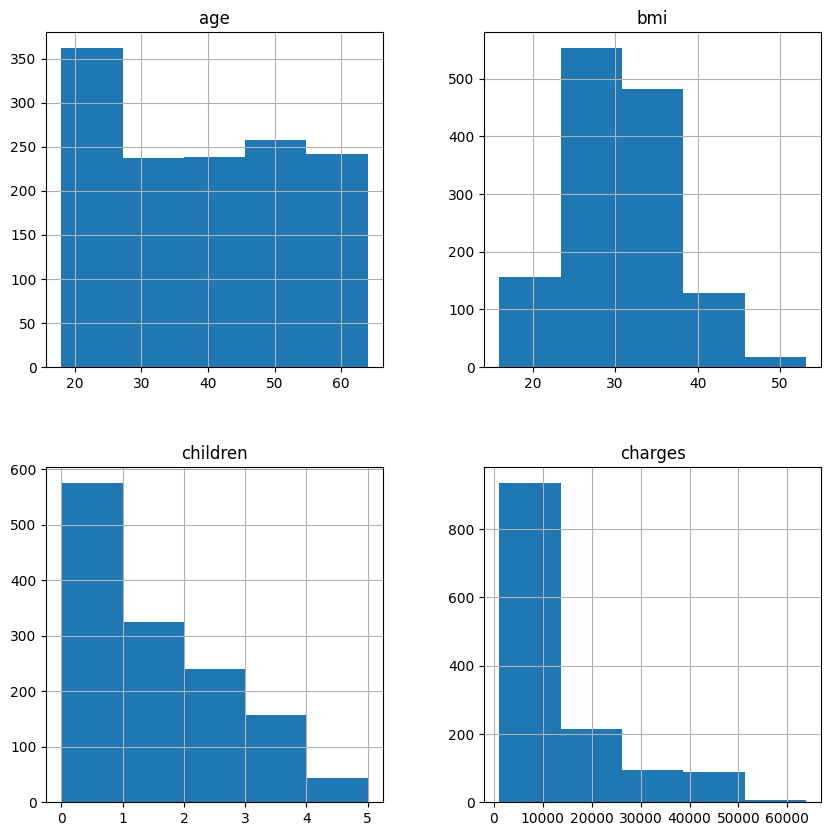

In [34]:
# your code
import matplotlib.pyplot as plt

num_features = df.select_dtypes(exclude=['object'])
num_features.hist(bins=5, figsize=(10,10))



### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [35]:
# your code
correlation = num_features.corr()
print(correlation)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

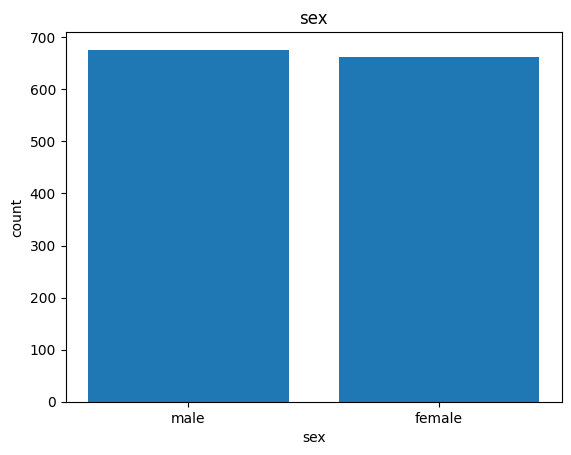

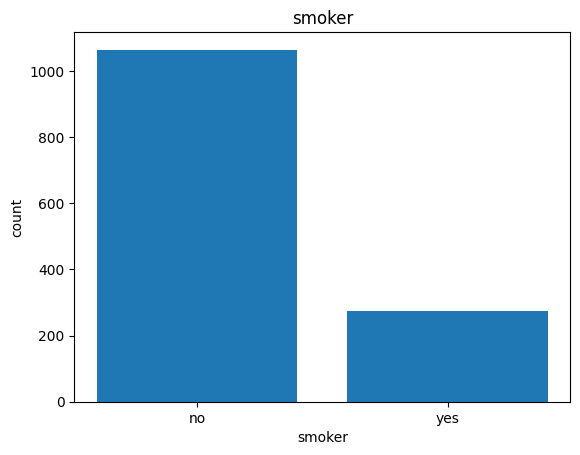

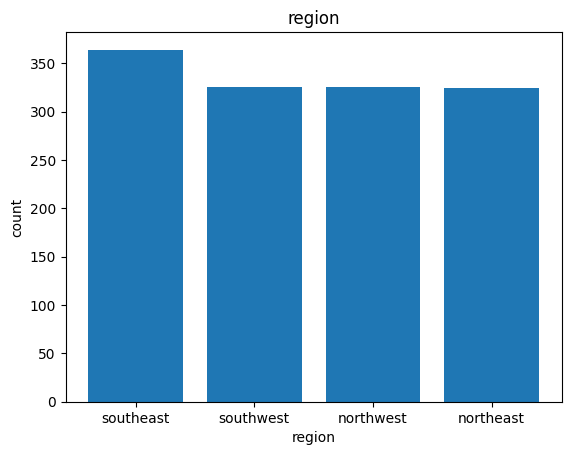

In [36]:
# your code

# get all features that are not numerical
cat_features = df.select_dtypes(exclude=['int64', 'float64'])
for feature in cat_features.columns:
    count = df[feature].value_counts()
    plt.bar(count.index, count.values)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()
    



### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [37]:
# your code
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()

df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())


1    676
0    662
Name: sex, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


### Q7. Normalize all numerical features

In [38]:
# your code
from sklearn.preprocessing import normalize, StandardScaler

# originally using normalize(), but was told zscore scaler is better
# df[['age', 'bmi', 'children', 'charges']] = normalize(df[['age', 'bmi', 'children', 'charges']])

std_scaler = StandardScaler()

df[['age', 'bmi', 'children', 'charges']] = std_scaler.fit_transform(df[['age', 'bmi', 'children', 'charges']])

### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [41]:
df.to_csv("insurance_preprocessed.csv", index=False)